<a href="https://colab.research.google.com/github/coachsu/code4au/blob/master/hillclimb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **單元名稱**：從程式設計的角度來看微分
本單元將帶同學以簡單的`Python`程式設計以爬山演算法(Hill Climbing)來看微分。

首先，我們可以踩著巨人的肩膀來寫程式。因此要先告知我們想要踩的巨人有哪些？


1.   `numpy`: 矩陣運算的巨人
2.   `matplotlib.pyplot`: 繪圖的巨人




In [0]:
import numpy as np
import matplotlib.pyplot as plt

設定要找到極值的目標函數

In [0]:
# 目標函數
def fun(x):
  return  (6 * x - 3) - x ** 2

接著，開始用爬山演算法來找到目標函數的極值

**第1步**: 設定起始位置。例如，可以從水平線開始爬(即`x = 0`)等。

In [0]:
# 設定起始位置
def init():
  return 0

**第2步**: 設定移動的方式。例如，往左或右爬、跨 1 小步或 1 大步等。

In [0]:
# 設定移動方式
# 傳入
#   x: 為目前位置
#   step: 為步伐大小
# 回傳
#   X: 所有可能的下一個位置 
def move(x, step):
  X = []
  X.append(x - step)
  X.append(x)
  X.append(x + step)
  return X 

**第3步**: 設定評估的方式。決定怎麼爬比較好。

In [0]:
# 設定評估方式
# order可以是 max 或 min 代表取得最大值或最小值 
def eval(x, move, step, order, fun):
  X = move(x, step)
  Y = []
  for x in X:
    Y.append(fun(x))
  idx = Y.index(order(Y))   # index()是在陣列中找尋某特定數值的位置
  return X[idx]  

In [0]:
# 基本爬山法演算法
def main():
  X_history = []
  step = 1
  trials = 1

  # Step 1. 取得初始位置
  x = init()
  X_history.append(x)
  draw(x, fun)
  # Step 2. 從初始位置開始往左右測試直到爬到山頂
  newx = eval(x, move, step, max, fun)
  while newx != x:
    x = newx
    draw(x, fun)
    X_history.append(x)
    newx = eval(x, move, step, max, fun)
    trials = trials + 1
  print('Optimal value is {} (x = {}) with {} trials'.format(fun(x), x, trials))
  print(X_history)

In [0]:
def draw(pos, fun):
  vfun = np.vectorize(fun)
  fig, axe = plt.subplots()
  X = np.linspace(0,6,100).reshape((100,1))
  axe.set_xlim(0,6)
  axe.plot(X, vfun(X), '-b')
  axe.plot(pos, vfun(pos), 'or')


Optimal value is 6 (x = 3) with 4 trials
[0, 1, 2, 3]


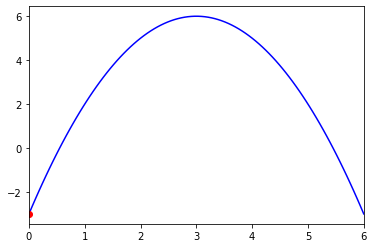

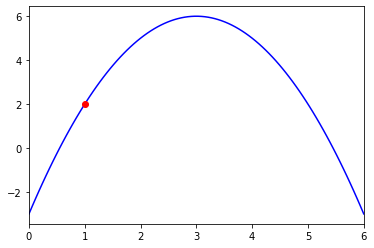

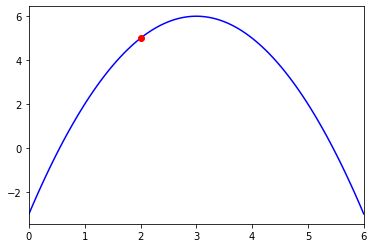

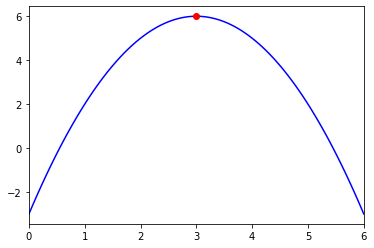

In [0]:
if __name__ == '__main__':
  main()